In [1]:
import pandas as pd

In [2]:
#!pip install spacy
#!pip install spacy_langdetect
#!python -m spacy download en

# Load the data , and remove that 1 row where mt is missing 

In [24]:
file_path = '../data/2022-da.csv'
data = pd.read_csv(file_path)
print(data.isna().sum())
print(data.shape)
data = data.dropna(subset=['src','mt', 'ref'])
print(data.shape)


lp            0
src           0
mt            1
ref           0
score         0
raw           0
annotators    0
domain        0
dtype: int64
(112604, 8)
(112603, 8)


In [4]:
from eda import display_stats

In [6]:
gdf , data = display_stats(data)
gdf.T

Unique count of `lp` field: 6


,0,1,2,3,4,5
lp,cs-en,de-en,ja-en,ru-en,uk-en,zh-en
src_length_count,16008,17204,23326,18776,16470,20819
src_min_length,2,1,1,1,2,1
src_max_length,71,115,25,58,75,18
src_avg_length,15.469453,14.631946,1.310255,13.597092,12.176138,1.569192
mt_min_length,1,1,1,1,2,1
mt_max_length,105,136,123,78,109,250
mt_avg_length,18.697526,15.853116,14.03764,16.88448,14.982817,25.122148
ref_min_length,2,1,1,1,2,1
ref_max_length,106,133,91,75,96,244


In [7]:
data.head()

,lp,src,mt,ref,score,raw,annotators,domain,src_length,mt_length,ref_length,max_length
0,uk-en,Добрий день вибачте будь ласка не мала інтерне...,﻿Good afternoon sorry please did not have the ...,"Good afternoon, sorry, there was no Internet c...",-0.457725,63.0,1,other,14,16,16,16
1,uk-en,"Скажіть будь-ласка, точну адресу куди завтра ї...",Please tell me the exact address where to go f...,Please tell me the exact address where I shoul...,-0.869663,41.0,1,other,24,29,29,29
2,uk-en,"Нажаль,я мушу відмовитися від Вашої пропозиції...","Unfortunately, I have to refuse your offer, be...","Unfortunately, I have to decline Your offer, b...",-0.659884,44.0,1,other,16,19,19,19
3,uk-en,"Вибачте,але не можу там відмовитись.","I'm sorry, but I can't say no.","Sorry, but I can’t decline their offer.",0.528864,61.0,1,other,5,7,7,7
4,uk-en,"Мені інколи здається, що через перекладач мої ...",Sometimes it seems to me that through the tran...,Sometimes it seems to me that my thoughts in C...,-0.589957,45.0,1,other,17,21,21,21


## Sample data

In [8]:
display(data.iloc[4])

lp                                                        uk-en
src           Мені інколи здається, що через перекладач мої ...
mt            Sometimes it seems to me that through the tran...
ref           Sometimes it seems to me that my thoughts in C...
score                                                 -0.589957
raw                                                        45.0
annotators                                                    1
domain                                                    other
src_length                                                   17
mt_length                                                    21
ref_length                                                   21
max_length                                                   21
Name: 4, dtype: object

## Tokenize and see the typical length of tokenized inputs

In [9]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

print('src tokenized')
print({x : tokenizer.encode(x, add_special_tokens=True) for x in data.src.values[0].split()})
print('mt tokenized')
print({x : tokenizer.encode(x, add_special_tokens=False) for x in data.mt.values[0].split()})

src tokenized
{'Добрий': [0, 184411, 312, 2], 'день': [0, 6365, 2], 'вибачте': [0, 1045, 48970, 226, 2], 'будь': [0, 14549, 2], 'ласка': [0, 65732, 2], 'не': [0, 77, 2], 'мала': [0, 21541, 2], 'інтернету': [0, 59820, 105, 2], 'і': [0, 189, 2], 'могла': [0, 39072, 2], 'швидше': [0, 193995, 2], 'надіслати.': [0, 2511, 17573, 76985, 5, 2], 'Дякую': [0, 220519, 2]}
mt tokenized
{'\ufeffGood': [18621], 'afternoon': [157109], 'sorry': [59090], 'please': [22936], 'did': [6777], 'not': [959], 'have': [765], 'the': [70], 'internet': [1820], 'and': [136], 'could': [5809], 'send': [25379], 'faster.': [4271, 56, 5], 'Thank': [25689], 'you': [398]}


In [10]:
idx = 12
print(data.lp.values[idx])
print('src:', data.src.values[idx])
print('mt:', data.mt.values[idx])
print('ref:', data.ref.values[idx])

print('src_tokens', tokenizer(data.src.values[idx])['input_ids'])
print('mt_tokens', tokenizer(data.mt.values[idx])['input_ids'])
print('ref_tokens', tokenizer(data.ref.values[idx])['input_ids'])

uk-en
src: Як розповіли агентству учасники заходу, херсонці встигли провести мітинг до того, як на місце прибули для розгону військові рф з технікою.
mt: As told the Agency the participants of the event, Kherson managed to hold a rally before the place arrived to disperse the military of the Russian Federation with equipment.
ref: As participants in the event told journalists, Kherson residents held a rally, and then the Russian military arrived at the scene with equipment to disperse them.
src_tokens [0, 4910, 238939, 51836, 11312, 171948, 169708, 4, 56510, 800, 6546, 2475, 201966, 546, 55389, 26636, 50028, 255, 2574, 4, 1443, 29, 25903, 440, 119447, 518, 2724, 695, 957, 201665, 6, 155673, 210, 11284, 894, 10572, 5, 2]
mt_tokens [0, 1301, 30745, 70, 103310, 70, 56480, 111, 70, 19732, 4, 16362, 56, 1681, 145755, 47, 16401, 10, 143107, 8108, 70, 3687, 174920, 47, 45, 20595, 184, 70, 116338, 111, 70, 102374, 200602, 678, 98154, 5, 2]
ref_tokens [0, 1301, 56480, 23, 70, 19732, 30745, 3248

## Tokenize in batch 

max:  335
min:  3


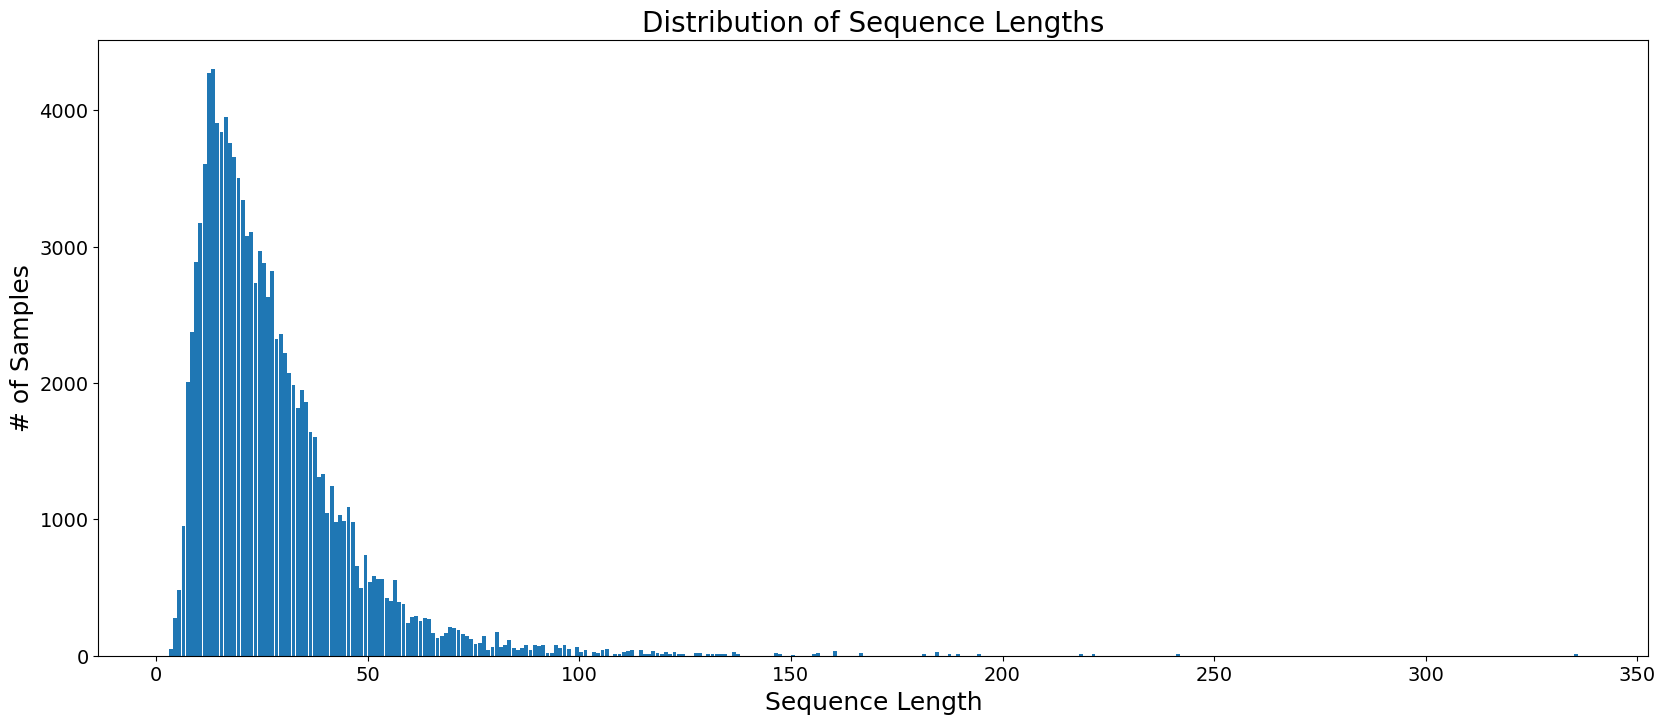

In [13]:
# tokenize the text feature 
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            data.ref.values.tolist(), 
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True      
                   )

# collect tokenized sentence length 
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, bins=range(min(token_sentence_length), max(token_sentence_length) + 2), rwidth=0.9)
plt.xlabel('Sequence Length', fontsize=18)
plt.ylabel('# of Samples', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Sequence Lengths', fontsize=20)

plt.show()

The maximum tokenized length is 335 . Now since attention is quadratic , we want to train 90% of the time using the smaller sentences. About 90000 of the samples have less than 50 tokens and so we shall do a 2 phase training. Phase 1 , only tick small samples ie with fix length < 50 tokens. Then retrain this model with the remaining 10% of the data . Note in COMET like training we are concatanating tokens and so concatenate src+mt+ref , we shall end up with a 150-200 tokens for each sample.

Could there be a better way to merge the embeddings of the 3 tokens. Can they belong to the embedding space?


In [26]:

threshold = 50
num_samples_greater_than_threshold = sum(length > threshold for length in token_sentence_length)
print(f'Number of samples greater than {threshold} in sequence length: {num_samples_greater_than_threshold}')

Number of samples greater than 50 in sequence length: 9756


In [27]:
data_50 = data[data.max_length < 60]
data_50.shape

AttributeError: 'DataFrame' object has no attribute 'max_length'